In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import numpy as np
from utils import label2one_hot
from generate_data import generate_data, generate_grid_data
from modules import Dropout
from modules import Linear, Sequential
from modules.losses import LossCrossEntropy, LossMSE
from optimizers import SGD
from modules.activations import ReLU

In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    if torch.is_tensor(points):
        points = points.numpy()
    
    print("points: {} -- points: {}".format(type(points), points.shape))
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [3]:
def default_net_1(x_all, y_all, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    ce = LossCrossEntropy()

    model = Sequential()
    model.add(Linear(out=num_of_neurons[1], input_size=num_of_neurons[0], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Dropout(prob=0.2))
    model.add(Linear(out=num_of_neurons[4], activation='softmax'))

    model.loss = ce
    sgd = SGD(lr, momentum_coef, weight_decay=0.2)

    sgd.train(model, x_all, y_all, num_of_epochs, val_split=0.2)

    return model

In [4]:
points, labels = generate_data(num_of_points=1000)
points, labels = generate_grid_data(num_of_points_per_dim=51)
print("Points: {} -- labels: {}".format(points.shape, labels.shape))

Points: torch.Size([2601, 2]) -- labels: torch.Size([2601])


points: <class 'numpy.ndarray'> -- points: (2601, 2)


array([0., 1.], dtype=float32)

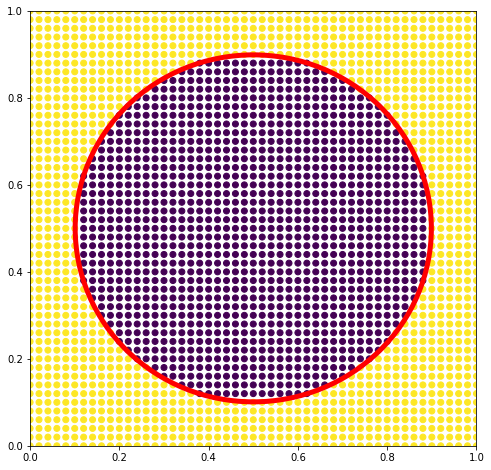

In [5]:
plot_data(points, labels)
np.unique(labels.numpy())

### Test with Categorical Crossentropy

In [6]:
x_all, y_all = generate_data(num_of_points=500)
y_all = label2one_hot(y_all, val=0)  # convert labels to 1-hot encoding

print("x_all.shape: {} -- y_all.shape: {}".format(x_all.shape, y_all.shape))

x_all.shape: torch.Size([500, 2]) -- y_all.shape: torch.Size([500, 2])


In [7]:
model = default_net_1(x_all, y_all, num_of_epochs=200)

Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
Added Module Name: 7_Linear 
Added Module Name: 8_Softmax 
x_train.shape: torch.Size([400, 2]) -- y_train.shape: torch.Size([400, 2])
x_val.shape: torch.Size([100, 2]) -- y_val.shape: torch.Size([100, 2])
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.7017495632171631
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.7228483557701111
key: val_acc -- value: 0.4699999988079071
epoch: 0 ---> train_loss: 0.7017, train_acc: 0.5249999761581421 ----- val_loss: 0.7228, val_acc: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])


torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6918463110923767
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6982059478759766
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6918395757675171
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6981399059295654
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6918348073959351
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6980961561203003
key: val_acc -- value: 0.

key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6975375413894653
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6916744112968445
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6975038051605225
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6916716694831848
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6974985003471375
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([1

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6915515065193176
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6974062323570251
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6915509700775146
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6974321603775024
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6915472149848938
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6973913311958313
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum

key: val_loss -- value: 0.6972045302391052
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6914331912994385
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6971929669380188
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6914300322532654
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6971718668937683
key: val_acc -- value: 0.4699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.69142687

In [8]:
x_test, y_test = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51)
test_acc, test_loss, y_pred = model.evaluate(x_test, label2one_hot(y_test, val=0), return_pred=True)
test_acc, test_loss

torch.Size([2601, 2])  --  torch.Size([2601, 2])


(tensor(0.5213), 0.6916163563728333)

torch.Size([2601, 2])  --  torch.Size([2601])
points: <class 'numpy.ndarray'> -- points: (2601, 2)


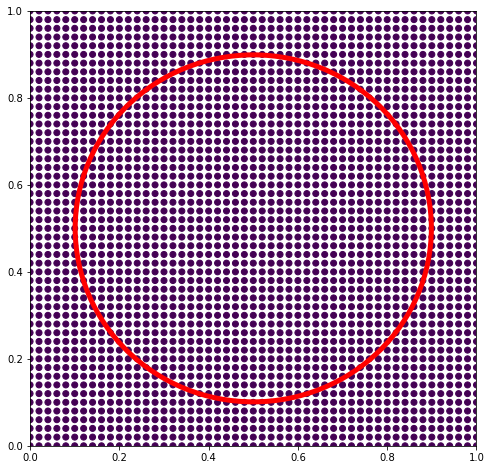

In [9]:
print(x_test.shape, " -- ", y_pred.shape)
plot_data(x_test, y_pred)

In [10]:
model.save_to_disk("model1.json")

In [11]:
model_loaded = Sequential()
model_loaded.load_from_disk("model1.json")

Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
Added Module Name: 7_Linear 
Added Module Name: 8_Softmax 


In [12]:
model_loaded.params

<generator object params at 0x000002A1AB7CCFC0>

In [13]:
test_acc, test_loss, y_pred = model.evaluate(x_test, label2one_hot(y_test, val=0), return_pred=True)

torch.Size([2601, 2])  --  torch.Size([2601, 2])


In [14]:
test_acc, test_loss, y_pred

(tensor(0.5213), 0.6916163563728333, tensor([ 1,  1,  1,  ...,  1,  1,  1]))

In [15]:
test_acc_, test_loss_, y_pred_ = model_loaded.evaluate(x_test, label2one_hot(y_test, val=0), return_pred=True)

torch.Size([2601, 2])  --  torch.Size([2601, 2])


In [16]:
test_acc_, test_loss_, y_pred_

(tensor(0.5213), 0.6916163563728333, tensor([ 1,  1,  1,  ...,  1,  1,  1]))

In [18]:
model.save_to_disk("sada", is_save_to_disk=False)

OrderedDict([('0_Linear',
              OrderedDict([('weight',
                            [[-0.19417282938957214,
                              0.22665274143218994,
                              -0.13162875175476074,
                              -0.08951851725578308,
                              0.15485428273677826,
                              -0.06357908248901367,
                              0.011495083570480347,
                              -0.27196550369262695,
                              0.20433089137077332,
                              0.09617514908313751,
                              -0.005770009942352772,
                              0.050613172352313995,
                              0.18356961011886597,
                              -0.23475386202335358,
                              -0.1589486449956894,
                              0.23115192353725433,
                              0.09717434644699097,
                              0.03036504238843918,
        

In [19]:
model_loaded.save_to_disk("sada", is_save_to_disk=False)

OrderedDict([('0_Linear',
              OrderedDict([('weight',
                            [[-0.19417282938957214,
                              0.22665274143218994,
                              -0.13162875175476074,
                              -0.08951851725578308,
                              0.15485428273677826,
                              -0.06357908248901367,
                              0.011495083570480347,
                              -0.27196550369262695,
                              0.20433089137077332,
                              0.09617514908313751,
                              -0.005770009942352772,
                              0.050613172352313995,
                              0.18356961011886597,
                              -0.23475386202335358,
                              -0.1589486449956894,
                              0.23115192353725433,
                              0.09717434644699097,
                              0.03036504238843918,
        